#Lista 1
-------------


**Objetivo**: Treinar modelos de classificação utilizando Regressão Logística e Árvore de Decisão.


**Banco de Dados**: Detecção de Doenças no Fígado


[Link para o banco](https://drive.google.com/file/d/1jnLwuv4e_ZeCqluMXs3Mar2TGetumtVv/view?usp=drive_link) 


Descrição do banco:
> Este banco de dados contém registros de 416 pacientes diagnosticados com doença no fígado e 167 pacientes sem a doença. Esta informação está na coluna `Selector`.
>
> O banco de dados possui 10 variáveis:
>
> * `age`: idade
> * `Gender`: gênero do paciente
> * `TB`: Bilirrubina total
> * `DB`: Bilirrubina direta
> * `Alkphos`: fosfatase alcalina.
> * `Sgpt`: transaminase glutâmico-pirúvica sérica (TGP)
> * `Sgot`: transaminase glutâmico-oxalacética sérica (TGO)
> * `TP`: Proteína total
> * `ALB`: Albumina
> * `A/G Ratio`: Relação Albumina:Globulina


Exercício:


1. Carregue o banco de dados e analise suas features (calcule as descritivas).  
* Transforme a feature sexo em uma variavel dummy.
2. Separe o banco dados:
* Utilize 80% dos dados para treino e 20% para teste.
3. Treine um modelo de Regressão Logística.
* Interprete dois coeficientes.
4. Treine um modelo de árvore de decisão. 
* Utilize max_depth de 4.
* Identifique as duas features mais importantes.
5. Construa um relatório comparativo dos dois modelos:
* Utilizando a **precisão da classe de pacientes doentes**, qual modelo tem melhor desempenho na detecção de doença no fígado?
* Utilizando o **f1-score da classe de pacientes doentes**, qual modelo tem melhor desempenho na detecção de doença no fígado?


Obs.: Utilize o **mesmo** conjunto de treino e teste para construir e avaliar ambos os modelos.

## 1. Carga do banco
--------------------

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

seedRandoStateG = 13

pd.set_option('display.float_format', lambda x: '%0f' % x)

df_indian_patient = pd.read_csv('./dataset/Indian Liver Patient Dataset (ILPD).csv', sep=',')
df_indian_patient.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.700000,0.100000,187,16,18,6.800000,3.300000,0.900000,1
1,62,Male,10.900000,5.500000,699,64,100,7.500000,3.200000,0.740000,1
2,62,Male,7.300000,4.100000,490,60,68,7.000000,3.300000,0.890000,1
3,58,Male,1.000000,0.400000,182,14,20,6.800000,3.400000,1.000000,1
4,72,Male,3.900000,2.000000,195,27,59,7.300000,2.400000,0.400000,1


In [175]:
df_indian_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [176]:
df_indian_patient.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [177]:
df_indian_patient.duplicated().sum()

np.int64(13)

In [178]:
df_indian_patient.drop_duplicates(inplace=True)
df_indian_patient.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,1.287719
std,16.242182,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [179]:
df_indian_patient.loc[df_indian_patient['Selector'] == 2, 'Selector'] = 0


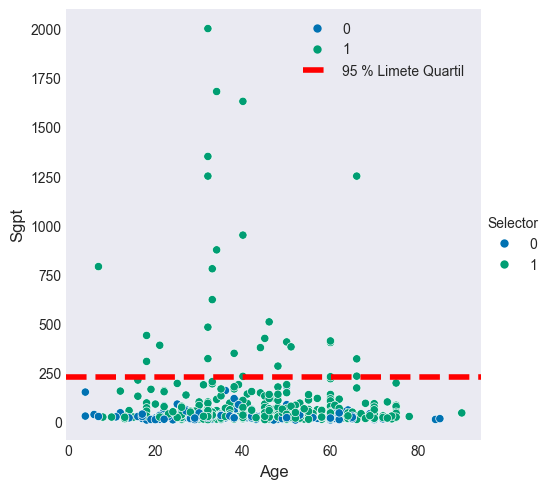

In [180]:

test_y_column = 'Sgpt'
test_quartil = .95
ax = sns.relplot(df_indian_patient, x='Age', y=test_y_column, hue='Selector')
plt.axhline(y= df_indian_patient[test_y_column].quantile(test_quartil), color='red', linestyle='--', label=f'{test_quartil*100:.0f} % Limete Quartil ')
plt.legend()
plt.show()

In [181]:
df_indian_patient_custom = df_indian_patient.dropna()
df_indian_patient_custom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        566 non-null    int64  
 1   Gender     566 non-null    object 
 2   TB         566 non-null    float64
 3   DB         566 non-null    float64
 4   Alkphos    566 non-null    int64  
 5   Sgpt       566 non-null    int64  
 6   Sgot       566 non-null    int64  
 7   TP         566 non-null    float64
 8   ALB        566 non-null    float64
 9   A/G Ratio  566 non-null    float64
 10  Selector   566 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.1+ KB


In [182]:
df_indian_patient_custom.groupby('Selector')['Age'].count().reset_index()

,Selector,Age
0,0,162
1,1,404


In [183]:

df_indian_patient_dummy = pd.get_dummies(df_indian_patient_custom, columns=['Gender'], drop_first=True)
df_indian_patient_dummy['Gender_Male'] = df_indian_patient_dummy['Gender_Male'].astype(int)
df_indian_patient_dummy.head()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector,Gender_Male
0,65,0.700000,0.100000,187,16,18,6.800000,3.300000,0.900000,1,0
1,62,10.900000,5.500000,699,64,100,7.500000,3.200000,0.740000,1,1
2,62,7.300000,4.100000,490,60,68,7.000000,3.300000,0.890000,1,1
3,58,1.000000,0.400000,182,14,20,6.800000,3.400000,1.000000,1,1
4,72,3.900000,2.000000,195,27,59,7.300000,2.400000,0.400000,1,1


### Após tratativa da base, exclusão das linhas duplicadas e nulas, ficamos com 402 registro de pacientes com doença e 162 sem a doença

## 2. Quebra do banco
--------------------

In [184]:
from sklearn.model_selection import train_test_split

feature_columns = df_indian_patient_dummy.drop(columns=['Selector']).columns
df_feature = df_indian_patient_dummy[feature_columns]
df_target = df_indian_patient_dummy['Selector']

In [185]:
feature_train, feature_test, target_train, target_test = train_test_split(df_feature, df_target, test_size=0.20, random_state=seedRandoStateG)

## 3. Primeiro modelo
--------------------

In [186]:
from sklearn.linear_model import LogisticRegression

logistcTest = LogisticRegression(random_state=seedRandoStateG)

logistcTest.fit(feature_train, target_train)

c:\Users\david\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=13)

## 3.1 Interpretação de dois coeficientes
--------------------

| Classe Predita | NegativoClasse Predita | PositivoClasse Real: NegativoVerdadeiro Negativo (VN)Falso Positivo (FP)Classe Real: PositivoFalso Negativo (FN)Verdadeiro Positivo 

In [187]:
pd.DataFrame(logistcTest.coef_.T, index=feature_columns ).sort_values(0, ascending=False)   

,0
DB,0.617014
TP,0.191351
TB,0.112075
Gender_Male,0.109656
Age,0.012478
Sgpt,0.009600
Sgot,0.002226
Alkphos,0.001731
ALB,-0.157567
A/G Ratio,-0.695225


In [188]:
target_pred = logistcTest.predict(feature_test)
target_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [189]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(target_test, target_pred)
cnf_matrix

array([[ 7, 31],
       [ 5, 71]])

In [190]:
target_names=['Sem cançer de figado', 'Com cançer de figado']
print(metrics.classification_report(target_pred, target_test, target_names=target_names))

                      precision    recall  f1-score   support

Sem cançer de figado       0.18      0.58      0.28        12
Com cançer de figado       0.93      0.70      0.80       102

            accuracy                           0.68       114
           macro avg       0.56      0.64      0.54       114
        weighted avg       0.86      0.68      0.74       114



In [191]:

predict_proba = logistcTest.predict_proba(feature_test)

def getBestLimiar(predictProba):
    best_acuracy = 0
 
    for index in np.arange(0, 1, .1):
        acc = metrics.accuracy_score(target_test, predictProba[:,1] >= index)
        print(f'LIMIAR: {index} ACC: {acc}')
        if acc > best_acuracy:
            best_acuracy = acc
    return best_acuracy

bestLimiar = getBestLimiar(predict_proba)
print(f'O melhor Limiar encontrado para base é: {bestLimiar}')

LIMIAR: 0.0 ACC: 0.6666666666666666
LIMIAR: 0.1 ACC: 0.6666666666666666
LIMIAR: 0.2 ACC: 0.6666666666666666
LIMIAR: 0.30000000000000004 ACC: 0.6666666666666666
LIMIAR: 0.4 ACC: 0.6491228070175439
LIMIAR: 0.5 ACC: 0.6842105263157895
LIMIAR: 0.6000000000000001 ACC: 0.7017543859649122
LIMIAR: 0.7000000000000001 ACC: 0.7631578947368421
LIMIAR: 0.8 ACC: 0.6491228070175439
LIMIAR: 0.9 ACC: 0.5701754385964912
O melhor Limiar encontrado para base é: 0.7631578947368421


In [192]:
predict_proba_best_limiar = (predict_proba[:,1] >= bestLimiar).astype(int)

print(metrics.classification_report(target_test, predict_proba_best_limiar, target_names=target_names))

                      precision    recall  f1-score   support

Sem cançer de figado       0.52      0.89      0.65        38
Com cançer de figado       0.92      0.58      0.71        76

            accuracy                           0.68       114
           macro avg       0.72      0.74      0.68       114
        weighted avg       0.78      0.68      0.69       114



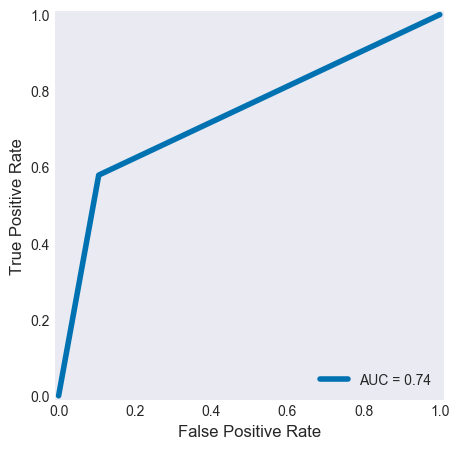

In [193]:
def show_roc_curve(true_test, predict_test):

    fpr, tpr, thresholds = metrics.roc_curve(true_test, predict_test)
    roc_auc = metrics.roc_auc_score(true_test, predict_test)
    roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    roc_display.plot()

show_roc_curve(target_test, predict_proba_best_limiar)

## 4. Segundo modelo
--------------------

In [194]:
from sklearn.tree import DecisionTreeClassifier

decisionTreeModel = DecisionTreeClassifier(random_state=seedRandoStateG)

decisionTreeModel.fit(feature_train, target_train)

DecisionTreeClassifier(random_state=13)

In [195]:
predict_tree_model = decisionTreeModel.predict(feature_test)
predict_tree_model

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0])

## 4.1 Duas features mais importantes
--------------------

In [196]:
df_importance = pd.DataFrame(decisionTreeModel.feature_importances_.T, index=feature_columns, columns=['Importancia'])
print('Feuatures mais importantes AGE e TB')
df_importance.sort_values('Importancia', ascending=False)


Feuatures mais importantes AGE e TB


,Importancia
Age,0.180947
TB,0.157829
Alkphos,0.146546
Sgpt,0.116401
A/G Ratio,0.107249
Sgot,0.096067
TP,0.082716
ALB,0.076991
DB,0.019263
Gender_Male,0.015991


## 5. Avaliação do modelo
--------------------

In [197]:
print(metrics.classification_report(target_test, predict_tree_model, target_names=target_names))

                      precision    recall  f1-score   support

Sem cançer de figado       0.52      0.34      0.41        38
Com cançer de figado       0.72      0.84      0.78        76

            accuracy                           0.68       114
           macro avg       0.62      0.59      0.59       114
        weighted avg       0.65      0.68      0.65       114



### Resultado modelo com Melhor Limiar

In [198]:
predict_proba_tree_model = decisionTreeModel.predict_proba(feature_test)

best_limiar_tree = getBestLimiar(predict_proba_tree_model)
best_limiar_tree

LIMIAR: 0.0 ACC: 0.6666666666666666
LIMIAR: 0.1 ACC: 0.6754385964912281
LIMIAR: 0.2 ACC: 0.6754385964912281
LIMIAR: 0.30000000000000004 ACC: 0.6754385964912281
LIMIAR: 0.4 ACC: 0.6754385964912281
LIMIAR: 0.5 ACC: 0.6754385964912281
LIMIAR: 0.6000000000000001 ACC: 0.6754385964912281
LIMIAR: 0.7000000000000001 ACC: 0.6754385964912281
LIMIAR: 0.8 ACC: 0.6754385964912281
LIMIAR: 0.9 ACC: 0.6754385964912281


0.6754385964912281

In [199]:
predict_proba_tree_best_limiar = (predict_proba_tree_model[:,1] >= best_limiar_tree).astype(int)

print(metrics.classification_report(target_test, predict_proba_tree_best_limiar, target_names=target_names))

                      precision    recall  f1-score   support

Sem cançer de figado       0.52      0.34      0.41        38
Com cançer de figado       0.72      0.84      0.78        76

            accuracy                           0.68       114
           macro avg       0.62      0.59      0.59       114
        weighted avg       0.65      0.68      0.65       114



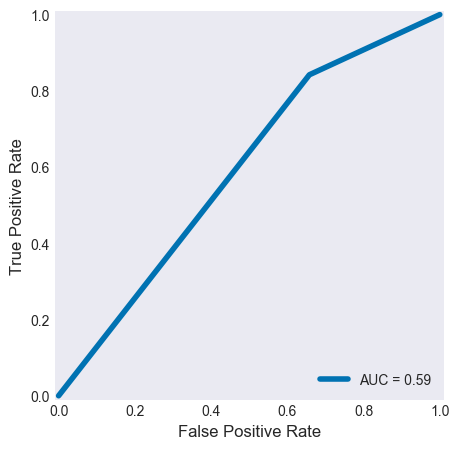

In [200]:
show_roc_curve(target_test, predict_proba_tree_best_limiar)

### Modelo com profundidade máxima 4 e melhor limiar

In [201]:
decisionTreeModel4 = DecisionTreeClassifier(max_depth=4, random_state=seedRandoStateG)
decisionTreeModel4.fit(feature_train, target_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [202]:
predict_proba_tree_4 = decisionTreeModel4.predict_proba(feature_test)

In [203]:
best_limiar_tree4 = getBestLimiar(predict_proba_tree_4)
best_limiar_tree4

LIMIAR: 0.0 ACC: 0.6666666666666666
LIMIAR: 0.1 ACC: 0.6578947368421053
LIMIAR: 0.2 ACC: 0.6578947368421053
LIMIAR: 0.30000000000000004 ACC: 0.6842105263157895
LIMIAR: 0.4 ACC: 0.6842105263157895
LIMIAR: 0.5 ACC: 0.6842105263157895
LIMIAR: 0.6000000000000001 ACC: 0.7017543859649122
LIMIAR: 0.7000000000000001 ACC: 0.6578947368421053
LIMIAR: 0.8 ACC: 0.631578947368421
LIMIAR: 0.9 ACC: 0.5701754385964912


0.7017543859649122

In [204]:
predict_proba_tree_best_limiar4 = (predict_proba_tree_4[:,1] >= best_limiar_tree4).astype(int)
print(metrics.classification_report(target_test, predict_proba_tree_best_limiar4, target_names=target_names))

                      precision    recall  f1-score   support

Sem cançer de figado       0.49      0.76      0.60        38
Com cançer de figado       0.84      0.61      0.70        76

            accuracy                           0.66       114
           macro avg       0.66      0.68      0.65       114
        weighted avg       0.72      0.66      0.67       114



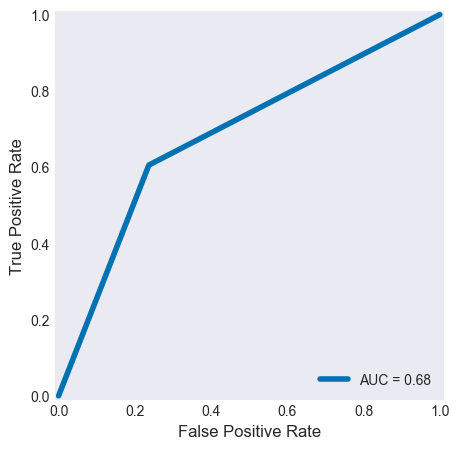

In [205]:
show_roc_curve(target_test, predict_proba_tree_best_limiar4)

#### Analisando melhor modelo da arvore de decisao

In [206]:
print('----------MODELO SEM PROFUNDIDADE MÁXIMA----------')
print(metrics.classification_report(target_test, predict_proba_tree_best_limiar, target_names=target_names))
print('----------MODELO PROFUNDIDADE MÁXIMA 4----------')
print(metrics.classification_report(target_test, predict_proba_tree_best_limiar4, target_names=target_names))

----------MODELO SEM PROFUNDIDADE MÁXIMA----------
                      precision    recall  f1-score   support

Sem cançer de figado       0.52      0.34      0.41        38
Com cançer de figado       0.72      0.84      0.78        76

            accuracy                           0.68       114
           macro avg       0.62      0.59      0.59       114
        weighted avg       0.65      0.68      0.65       114

----------MODELO PROFUNDIDADE MÁXIMA 4----------
                      precision    recall  f1-score   support

Sem cançer de figado       0.49      0.76      0.60        38
Com cançer de figado       0.84      0.61      0.70        76

            accuracy                           0.66       114
           macro avg       0.66      0.68      0.65       114
        weighted avg       0.72      0.66      0.67       114



### Resumo da Comparação dos Modelos

Foram comparados dois modelos de classificação para detecção de câncer de fígado: Um sem limite de profundidade e outro com profundidade máxima de 4. 

- **Modelo sem profundidade máxima:** 
  - Melhor precisão e recall para "Com câncer de fígado".
  - Acurácia de 68%, mas com mais falsos negativos para "Sem câncer de fígado".
  
- **Modelo com profundidade máxima de 4:** 
  - Melhor recall para "Sem câncer de fígado".
  - Acurácia de 66%, com menor recall para "Com câncer de fígado".

**O modelo sem profundidade é mais sensível para detectar câncer e o com profundidade tem um um equilíbrio maior entre as classes.**


Utilizaremos o Modelo com maior equilibrio entre as classes para comparação com modelo de regressão

## 5.1 Qual modelo escolhido olhando para a precisão de detecção de doença no fígado?
--------------------

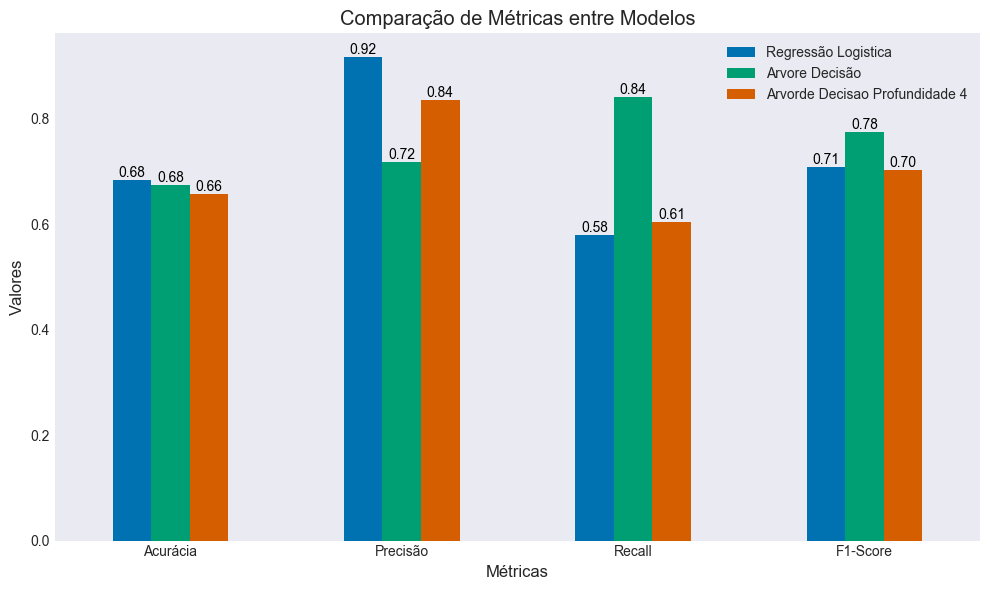

In [207]:
metrics_logist_model = pd.Series({
    'Acurácia': metrics.accuracy_score(target_test, predict_proba_best_limiar),
    'Precisão': metrics.precision_score(target_test, predict_proba_best_limiar),
    'Recall': metrics.recall_score(target_test, predict_proba_best_limiar),
    'F1-Score': metrics.f1_score(target_test, predict_proba_best_limiar)
})

metrics_decision_tree_model = pd.Series({
    'Acurácia': metrics.accuracy_score(target_test, predict_proba_tree_best_limiar),
    'Precisão':metrics.precision_score(target_test, predict_proba_tree_best_limiar),
    'Recall': metrics.recall_score(target_test, predict_proba_tree_best_limiar),
    'F1-Score': metrics.f1_score(target_test, predict_proba_tree_best_limiar)
})

metrics_decision_tree_model_max4 = pd.Series({
    'Acurácia': metrics.accuracy_score(target_test, predict_proba_tree_best_limiar4),
    'Precisão':metrics.precision_score(target_test, predict_proba_tree_best_limiar4),
    'Recall': metrics.recall_score(target_test, predict_proba_tree_best_limiar4),
    'F1-Score': metrics.f1_score(target_test, predict_proba_tree_best_limiar4)
})

df_metrics = pd.DataFrame({'Regressão Logistica': metrics_logist_model, 
                           'Arvore Decisão': metrics_decision_tree_model,
                           'Arvorde Decisao Profundidade 4': metrics_decision_tree_model_max4})

plt.style.use('seaborn-v0_8-colorblind')
ax = df_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Comparação de Métricas entre Modelos')
plt.ylabel('Valores')
plt.xlabel('Métricas')
plt.xticks(rotation=0)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',  
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom',  
        fontsize=10,
        color='black'  
    )

plt.show()

Com base no grafico acima, o modelo de Regressão Logística tem a melhor precisão, indicando que ele gera menos falsos positivos em comparação com os outros modelos.

## 5.2 Qual modelo escolhido olhando para o f1-score do rótulo de doença do fígado?
--------------------

De acordo com Grafico acima a Árvore de Decisão com Profundidade Máxima de 4 tem o melhor F1-Score que equilibra melhor as métricas de precisão e recall, oferecendo um desempenho mais estável em geral.